In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
import warnings

In [5]:
df = pd.read_csv("D:/Student_Performance.csv")

In [6]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
x = df.drop(columns = ["math score"], axis = 1)
x

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [8]:
y = df["math score"]
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [9]:
print("Categories in 'gender' variable: ", end = " ")
print(df["gender"].unique())

print("Categories in 'race ethnicity' variable: ", end = " ")
print(df["race/ethnicity"].unique())

print("Categories in 'parebtal level of education' variable: ", end = " ")
print(df["parental level of education"].unique())

print("Categories in 'test preparation course' variable: ", end = " ")
print(df["test preparation course"].unique())


Categories in 'gender' variable:  ['female' 'male']
Categories in 'race ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parebtal level of education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'test preparation course' variable:  ['none' 'completed']


In [10]:
num_cols = x.select_dtypes(exclude = "object").columns
cat_cols = x.select_dtypes(include = "object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

num_trans = StandardScaler()
oh_trans = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_trans, cat_cols),
        ("StandardScaler", num_trans, num_cols),

    ]

)


In [11]:
X = preprocessor.fit_transform(x)
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [12]:
X.shape

(1000, 19)

In [13]:
#Separating train and test for the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 23)

# Creating an Evaluate Function to give all metrics after Model Training

In [15]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2 = r2_score(true, predicted)
    return mae, mse, rmse, r2

In [16]:
models = {
    "LR": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "KNN": KNeighborsRegressor(),
    "DT": DecisionTreeRegressor(),
    "RF": RandomForestRegressor()
}

model_list = []
r2_list = []

for model_name, model in models.items():
    model.fit(x_train, y_train)

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    model_train_mae, model_train_rmse, model_train_r2, *_ = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2, *_ = evaluate_model(y_test, y_test_pred)

    print(model_name)
    model_list.append(model_name)

    print("Model performance for Training set")
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))
    print("\n")
    print("Model performance for Test set")
    print("- Root Mean Square Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    r2_list.append(model_test_r2)
    print("\n")


LR
Model performance for Training set
- Root Mean Squared Error: 27.6800
- Mean Absolute Error: 4.1721
- R2 Score: 5.2612


Model performance for Test set
- Root Mean Square Error: 31.5942
- Mean Absolute Error: 4.5800
- R2 Score: 5.6209


Lasso
Model performance for Training set
- Root Mean Squared Error: 42.9021
- Mean Absolute Error: 5.1997
- R2 Score: 6.5500


Model performance for Test set
- Root Mean Square Error: 43.5166
- Mean Absolute Error: 5.1005
- R2 Score: 6.5967


Ridge
Model performance for Training set
- Root Mean Squared Error: 27.6618
- Mean Absolute Error: 4.1672
- R2 Score: 5.2594


Model performance for Test set
- Root Mean Square Error: 31.5742
- Mean Absolute Error: 4.5672
- R2 Score: 5.6191


KNN
Model performance for Training set
- Root Mean Squared Error: 33.3310
- Mean Absolute Error: 4.5743
- R2 Score: 5.7733


Model performance for Test set
- Root Mean Square Error: 50.6826
- Mean Absolute Error: 5.7310
- R2 Score: 7.1192


DT
Model performance for Training

# Results

In [18]:
pd.DataFrame(list(zip(model_list, r2_list)), columns = ["Model Name", "R2_Score"]).sort_values(by = ["R2_Score"], ascending = False)

,Model Name,R2_Score
4,DT,8.833459
3,KNN,7.119171
1,Lasso,6.596713
5,RF,6.453851
0,LR,5.620873
2,Ridge,5.619091


# Linear Regression

In [20]:
lin_model = LinearRegression(fit_intercept =True)
lin_model = lin_model.fit(x_train, y_train)
y_pred = lin_model.predict(x_test)
score = r2_score(y_test, y_pred)*100
print("Accuracy of the model of %.2f" %score)

Accuracy of the model of 85.24


# Plot y_pred and y_test

Text(0, 0.5, 'Predicted')

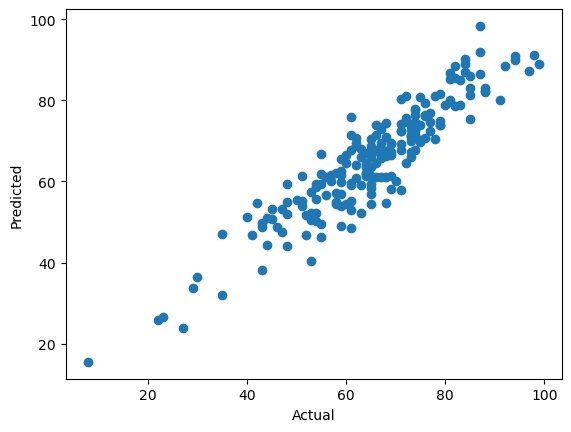

In [22]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")

<Axes: xlabel='math score'>

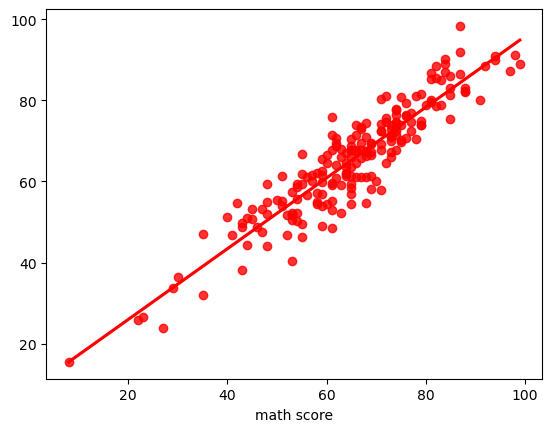

In [23]:
sns.regplot(x= y_test, y = y_pred, ci=None, color ="Red")

# Difference between Actual and Predicted Values

In [25]:
pred_df = pd.DataFrame({
    "Actual Value": y_test, 
    "Predicted Value": y_pred, 
    "Difference": y_test - y_pred
})

pred_df


,Actual Value,Predicted Value,Difference
519,67,65.867188,1.132812
837,75,69.843750,5.156250
208,74,67.867188,6.132812
525,68,71.078125,-3.078125
978,55,49.531250,5.468750
...,...,...,...
647,64,62.000000,2.000000
481,52,46.718750,5.281250
134,74,73.421875,0.578125
366,69,58.187500,10.812500
